<a href="https://colab.research.google.com/github/Alphaleader007/DL/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torchvision as vsn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_dataset=vsn.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
test_dataset=vsn.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [9]:
model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [10]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [12]:
batch_size=128
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)
test_loader=torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [13]:
n_epochs=10
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)
for it in range(n_epochs):
  train_loss=[]
  for inputs,targets in train_loader:
    inputs,targets=inputs.to(device),targets.to(device)
    inputs=inputs.view(-1,784)
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  train_loss=np.mean(train_loss)
  test_loss=[]
  for inputs,targets in test_loader:
    inputs,targets=inputs.to(device),targets.to(device)
    inputs=inputs.view(-1,784)
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    test_loss.append(loss.item())
  test_loss=np.mean(test_loss)
  train_losses[it]=train_loss
  test_losses[it]=test_loss
  print(f"Epoch {it+1}/{n_epochs} , Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/10 , Train Loss: 0.4176, Test Loss: 0.2277
Epoch 2/10 , Train Loss: 0.1955, Test Loss: 0.1634
Epoch 3/10 , Train Loss: 0.1441, Test Loss: 0.1317
Epoch 4/10 , Train Loss: 0.1115, Test Loss: 0.1121
Epoch 5/10 , Train Loss: 0.0905, Test Loss: 0.1014
Epoch 6/10 , Train Loss: 0.0754, Test Loss: 0.0884
Epoch 7/10 , Train Loss: 0.0628, Test Loss: 0.0852
Epoch 8/10 , Train Loss: 0.0538, Test Loss: 0.0812
Epoch 9/10 , Train Loss: 0.0460, Test Loss: 0.0747
Epoch 10/10 , Train Loss: 0.0387, Test Loss: 0.0730


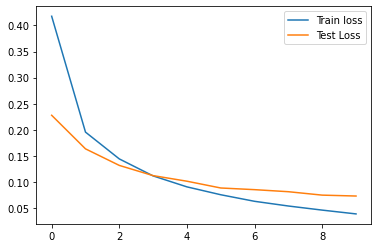

In [14]:
plt.plot(train_losses,label="Train loss")
plt.plot(test_losses,label="Test Loss")
plt.legend()
plt.show()

In [16]:
n_correct=0
n_total=0
for inputs,targets in train_loader:
  inputs,targets=inputs.to(device),targets.to(device)
  inputs=inputs.view(-1,784)
  outputs=model(inputs)
  _,predictions=torch.max(outputs,1)
  n_correct+=(predictions==targets).sum().item()
  n_total+=targets.shape[0]
train_acc=n_correct/n_total

n_correct=0
n_total=0
for inputs,targets in test_loader:
  inputs,targets=inputs.to(device),targets.to(device)
  inputs=inputs.view(-1,784)
  outputs=model(inputs)
  _,predictions=torch.max(outputs,1)
  n_correct+=(predictions==targets).sum().item()
  n_total+=targets.shape[0]
test_acc=n_correct/n_total

print(f"Train Acc: {train_acc:.4f}  Test Acc: {test_acc:.4f}")

Train Acc: 0.9925  Test Acc: 0.9781
